# includes and data read

In [502]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import PolynomialFeatures
import scipy.cluster.hierarchy as sch
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [503]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [504]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/graduation_rate.csv')

# data analysis

In [505]:
data.head()

,ACT composite score,SAT total score,parental level of education,parental income,high school gpa,college gpa,years to graduate
0,22,1625,high school,40999,3.0,3.1,7
1,29,2090,associate's degree,75817,4.0,3.4,5
2,30,2188,bachelor's degree,82888,4.0,3.9,3
3,33,2151,associate's degree,93518,4.0,3.7,5
4,29,2050,associate's degree,79153,4.0,3.4,6


In [506]:
print(f'Rows: {data.shape[0]}, Columns: {data.shape[1]}')

Rows: 1000, Columns: 7


In [507]:
print(data.columns)

Index(['ACT composite score', 'SAT total score', 'parental level of education',
       'parental income', 'high school gpa', 'college gpa',
       'years to graduate'],
      dtype='object')


In [508]:
data.columns = data.columns.str.lower().str.replace(' ', '_')

In [509]:
print(data.columns)

Index(['act_composite_score', 'sat_total_score', 'parental_level_of_education',
       'parental_income', 'high_school_gpa', 'college_gpa',
       'years_to_graduate'],
      dtype='object')


In [510]:
data.dtypes

act_composite_score              int64
sat_total_score                  int64
parental_level_of_education     object
parental_income                  int64
high_school_gpa                float64
college_gpa                    float64
years_to_graduate                int64
dtype: object

In [511]:
data.describe().round(2)

,act_composite_score,sat_total_score,parental_income,high_school_gpa,college_gpa,years_to_graduate
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,28.61,1999.91,67377.85,3.71,3.38,4.98
std,2.77,145.08,18827.33,0.29,0.24,1.41
min,20.00,1598.00,18906.00,2.80,2.60,3.00
25%,27.00,1898.00,54269.75,3.50,3.20,4.00
50%,28.50,2000.00,67842.50,3.80,3.40,5.00
75%,31.00,2099.00,80465.50,4.00,3.50,6.00
max,36.00,2385.00,124470.00,4.00,4.00,10.00


In [512]:
for col in data.columns:
  print(col)
  print(f'First 5 unique values: {data[col].unique()[:5]}')
  print(f'Number of unique values: {data[col].nunique()}\n')

act_composite_score
First 5 unique values: [22 29 30 33 28]
Number of unique values: 17

sat_total_score
First 5 unique values: [1625 2090 2188 2151 2050]
Number of unique values: 474

parental_level_of_education
First 5 unique values: ['high school' "associate's degree" "bachelor's degree" "master's degree"
 'some college']
Number of unique values: 6

parental_income
First 5 unique values: [40999 75817 82888 93518 79153]
Number of unique values: 992

high_school_gpa
First 5 unique values: [3.  4.  3.8 3.7 3.9]
Number of unique values: 13

college_gpa
First 5 unique values: [3.1 3.4 3.9 3.7 3.5]
Number of unique values: 15

years_to_graduate
First 5 unique values: [7 5 3 6 4]
Number of unique values: 8



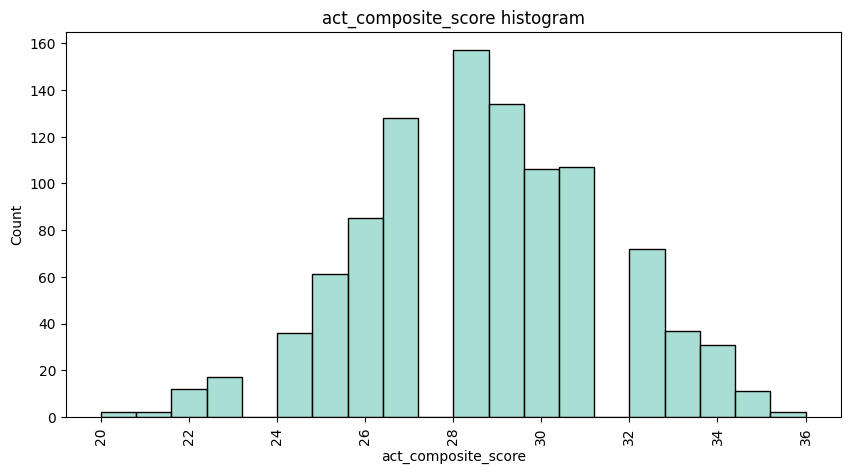

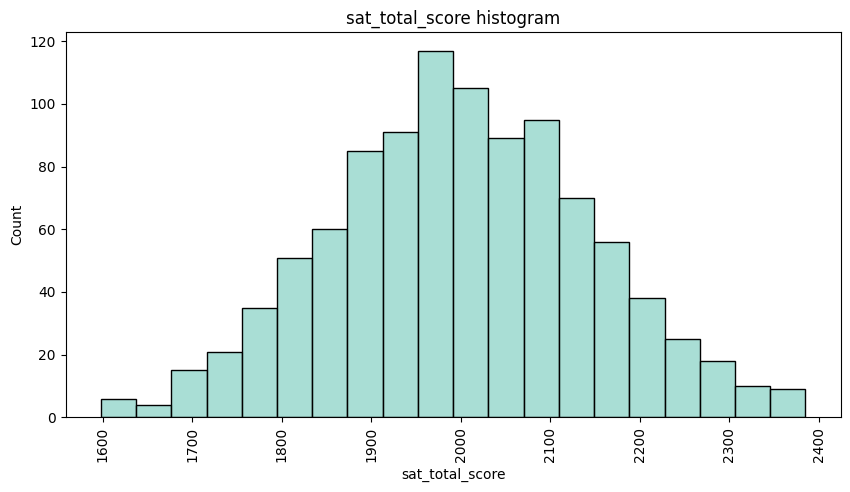

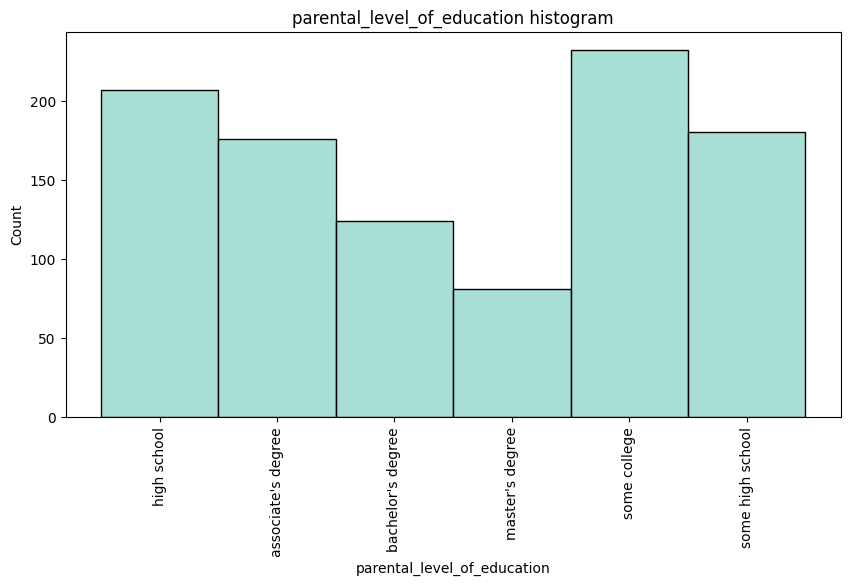

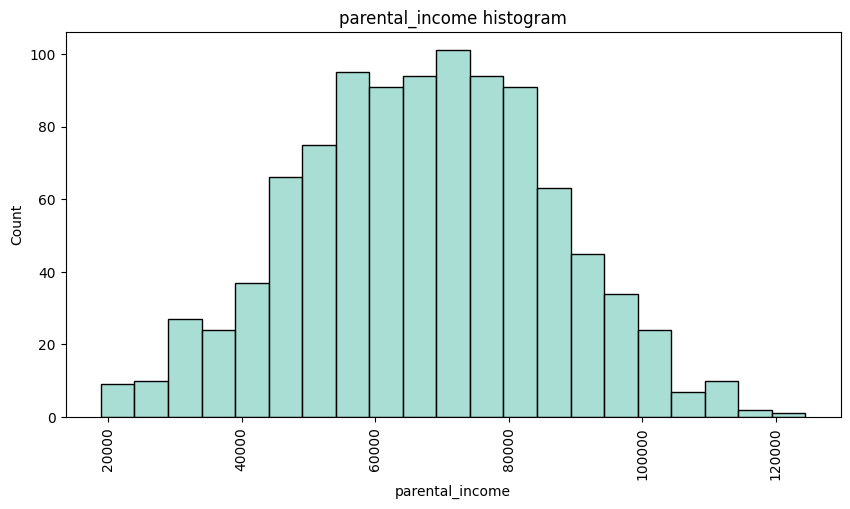

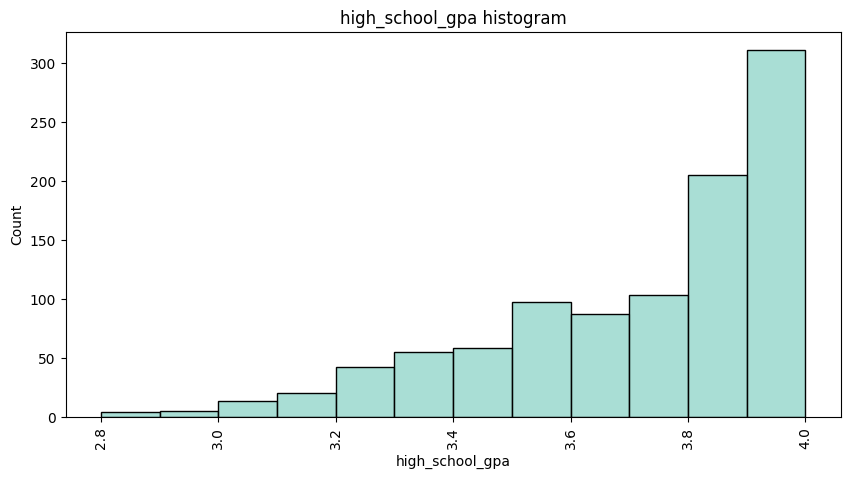

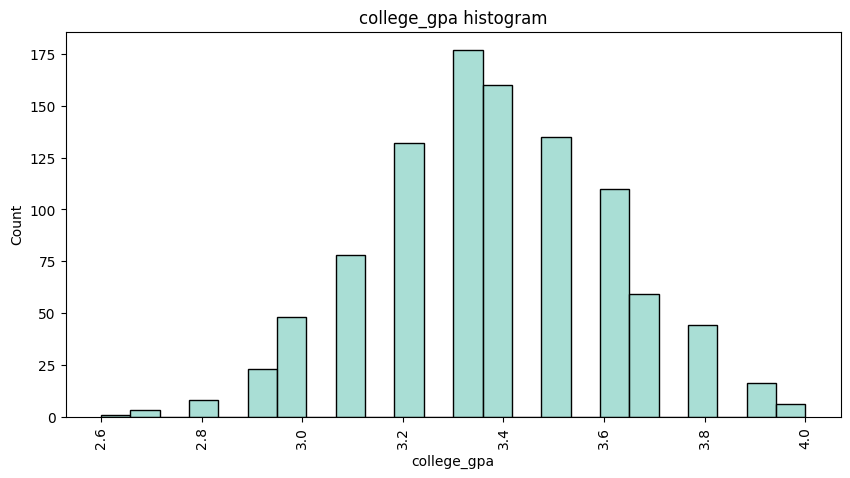

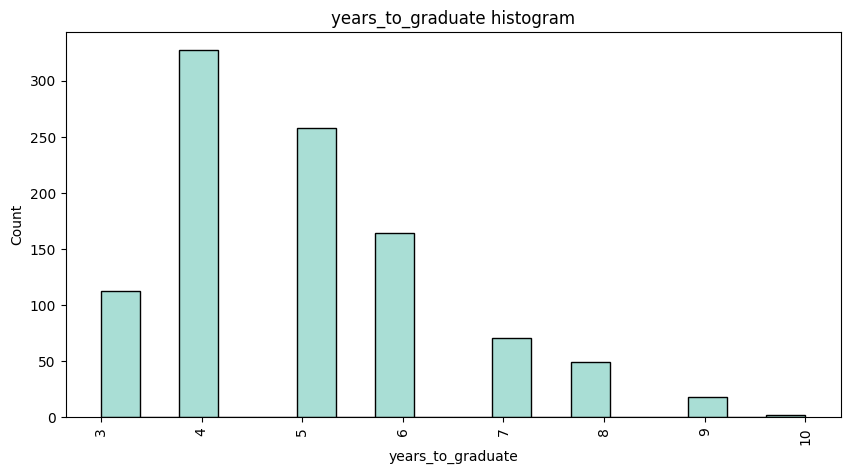

In [513]:
for col in data.columns:
  fig, ax = plt.subplots(figsize=(10, 5))
  ax.tick_params(axis='x', rotation=90)
  plt.title(f'{col} histogram')
  sns.histplot(data=data, x=col, ax=ax)
  plt.show()

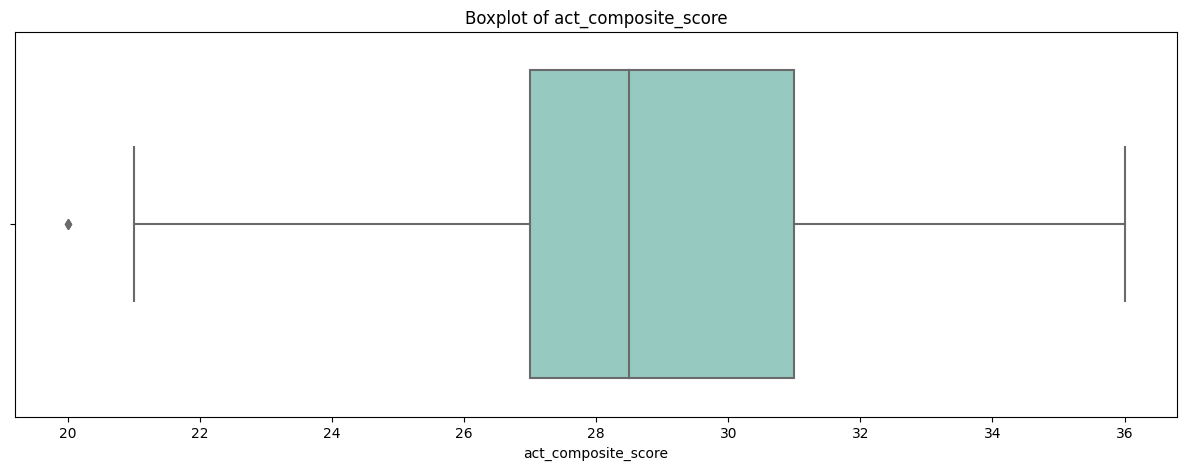

In [514]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.title('Boxplot of act_composite_score')
sns.boxplot(data = data, x = "act_composite_score");

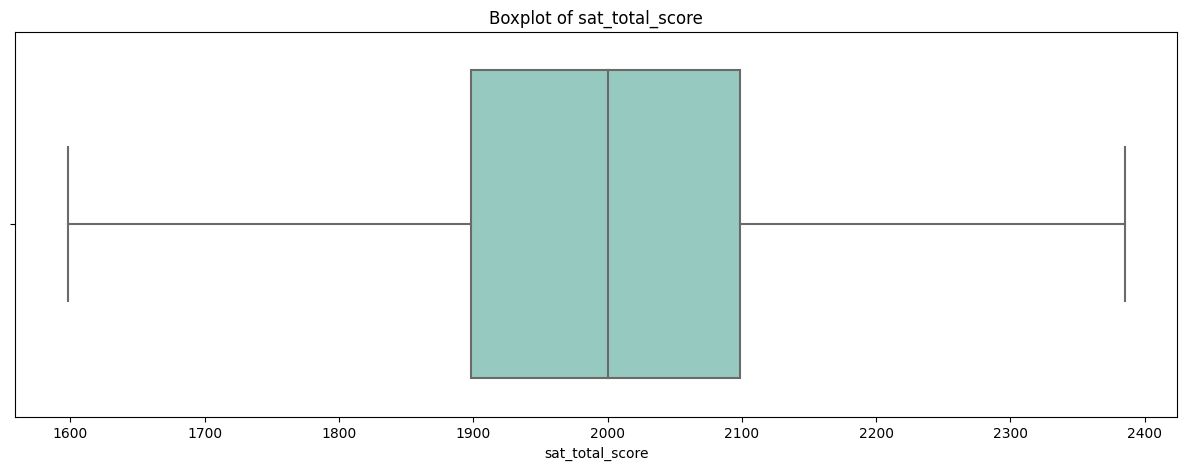

In [515]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.title('Boxplot of sat_total_score')
sns.boxplot(data = data, x = "sat_total_score");

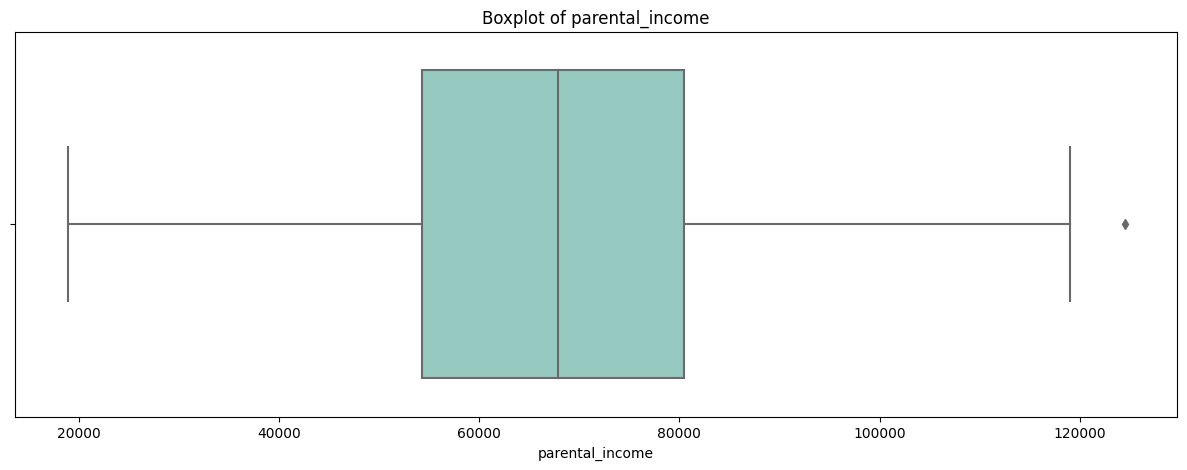

In [516]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.title('Boxplot of parental_income')
sns.boxplot(data = data, x = "parental_income");

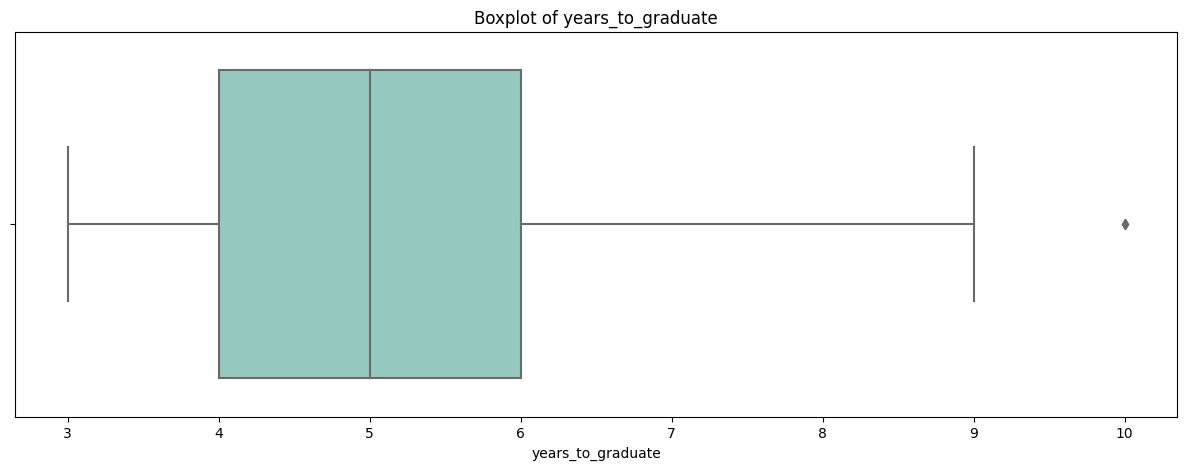

In [517]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.title('Boxplot of years_to_graduate')
sns.boxplot(data = data, x = "years_to_graduate");

there is an outliers 


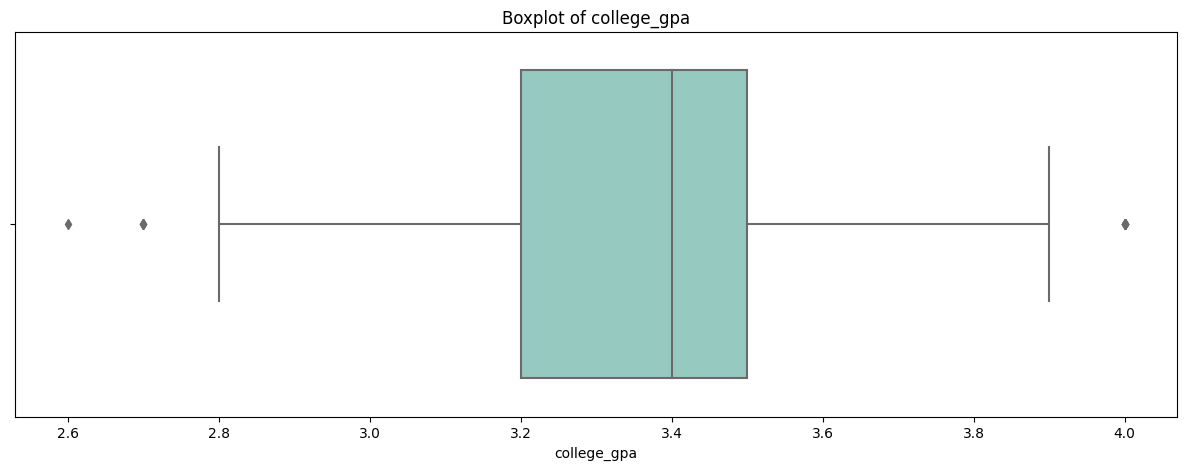

In [518]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.title('Boxplot of college_gpa')
sns.boxplot(data = data, x = "college_gpa");

in school and college gpa there is no outliers


Features vs. charges

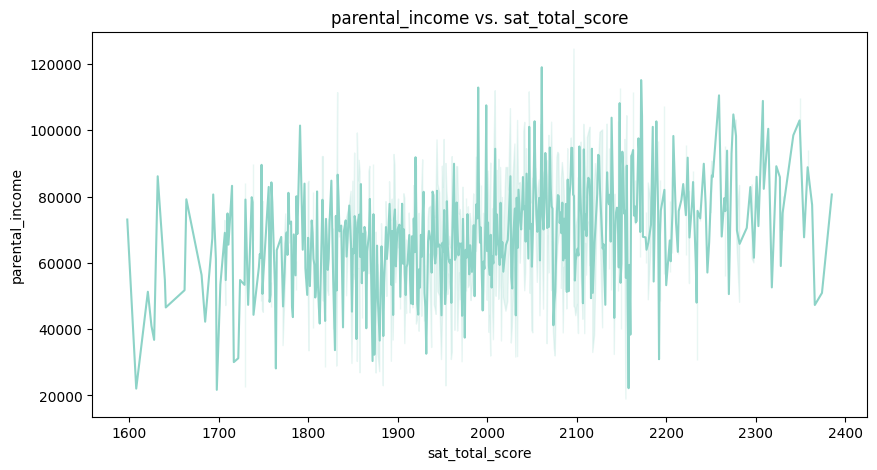

In [519]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.title('parental_income vs. sat_total_score')
sns.lineplot(data=data, x="sat_total_score", y="parental_income");

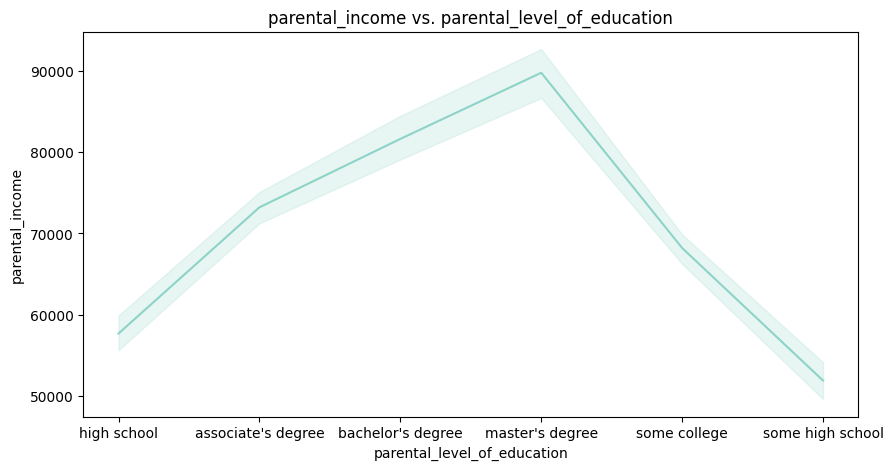

In [520]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.title('parental_income vs. parental_level_of_education')
sns.lineplot(data=data, x="parental_level_of_education", y="parental_income");

its normal bec as parental level of education is high parental_income increase


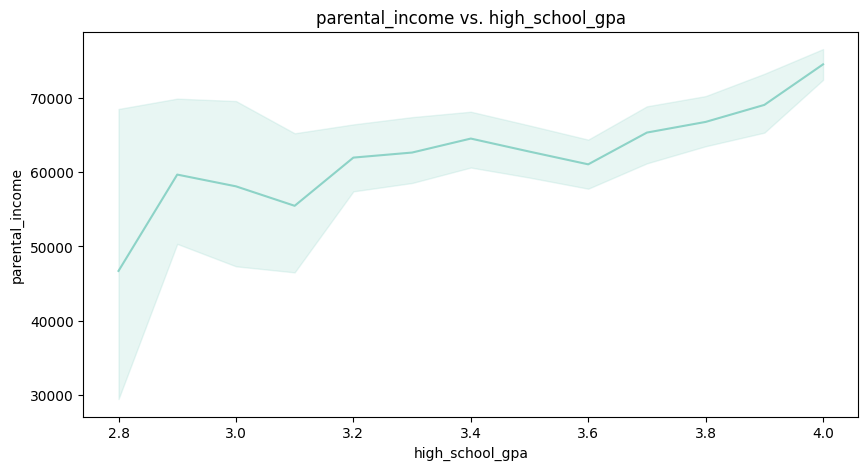

In [521]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.title('parental_income vs. high_school_gpa')
sns.lineplot(data=data, x="high_school_gpa", y="parental_income");

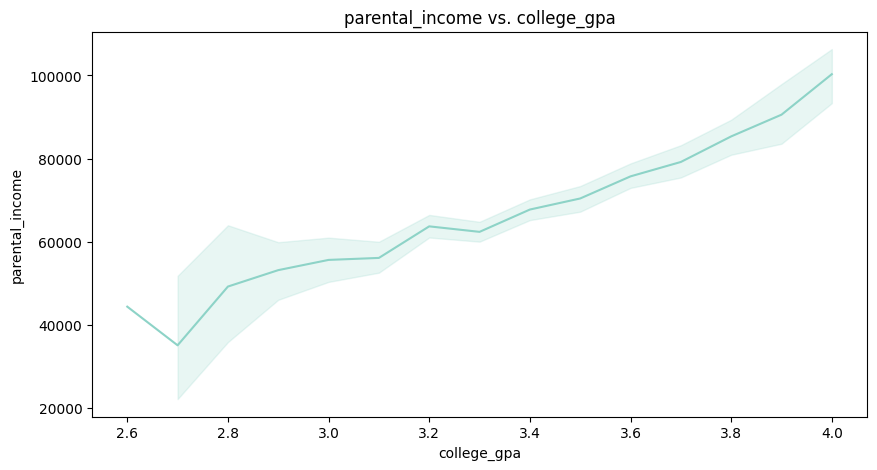

In [522]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.title('parental_income vs. college_gpa')
sns.lineplot(data=data, x="college_gpa", y="parental_income");

In [523]:
data.corr()['parental_income']

<ipython-input-523-554af4d53fe1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['parental_income']


act_composite_score    0.203207
sat_total_score        0.273487
parental_income        1.000000
high_school_gpa        0.266822
college_gpa            0.463646
years_to_graduate     -0.213390
Name: parental_income, dtype: float64

In [524]:
data.columns

Index(['act_composite_score', 'sat_total_score', 'parental_level_of_education',
       'parental_income', 'high_school_gpa', 'college_gpa',
       'years_to_graduate'],
      dtype='object')

# preprocessing

check if there nulls values or not


In [525]:
data.isna().sum()

act_composite_score            0
sat_total_score                0
parental_level_of_education    0
parental_income                0
high_school_gpa                0
college_gpa                    0
years_to_graduate              0
dtype: int64

**handling** outliers 

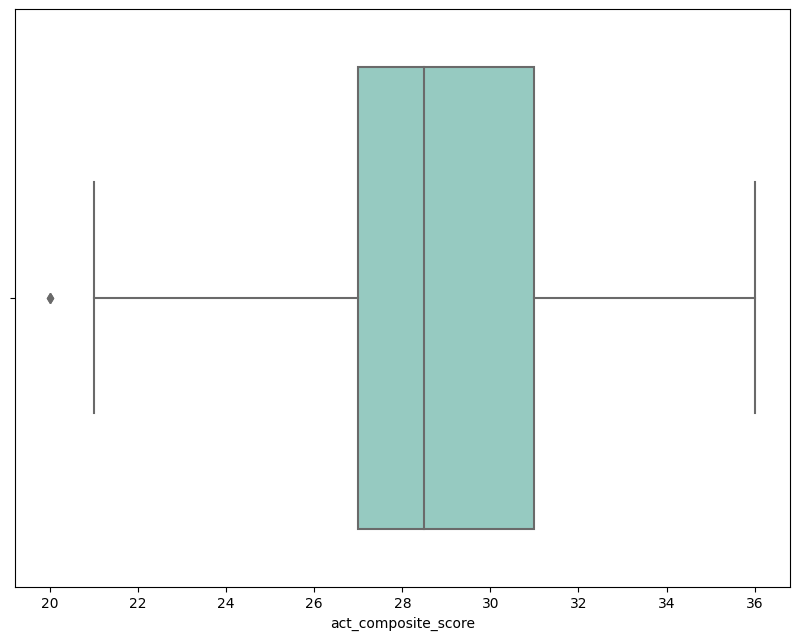

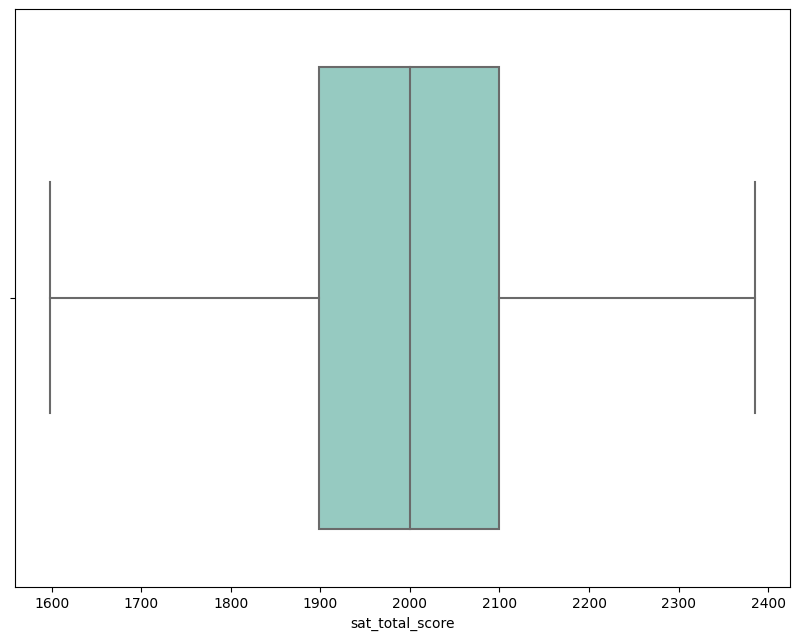

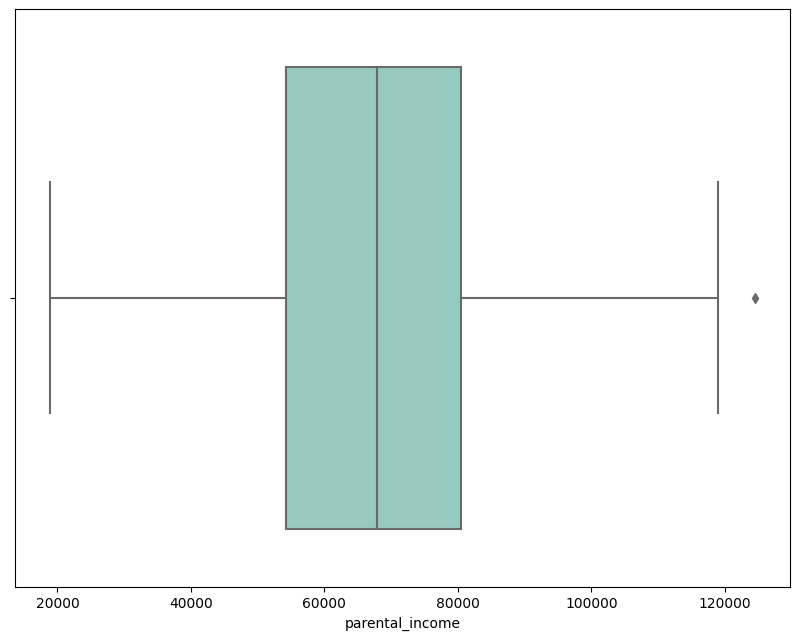

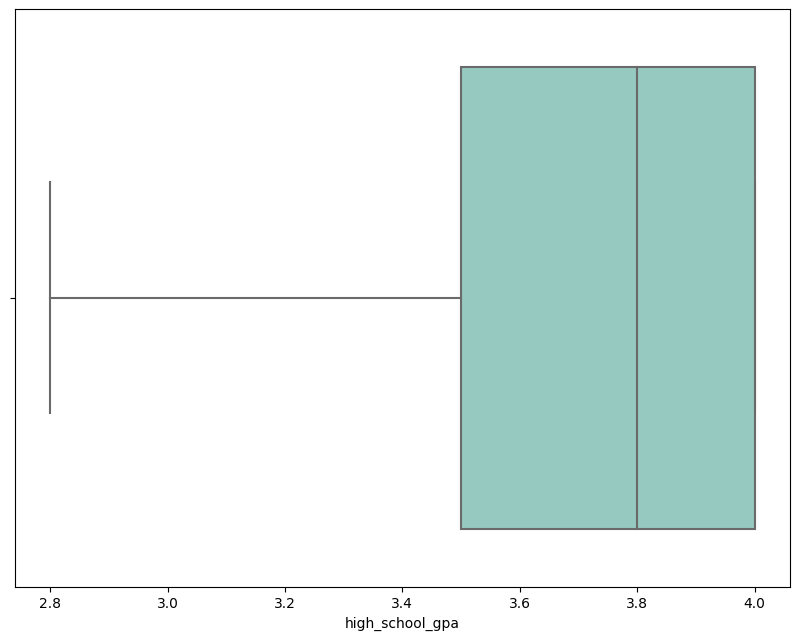

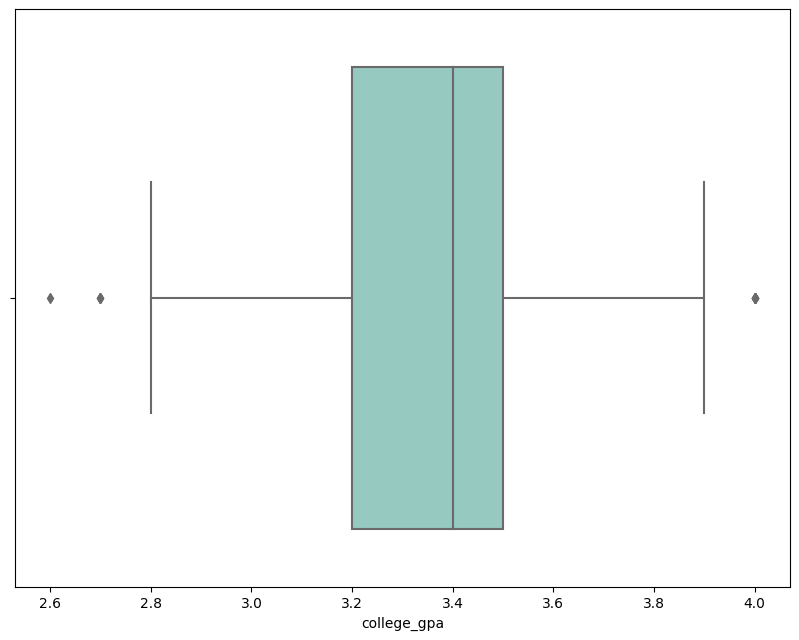

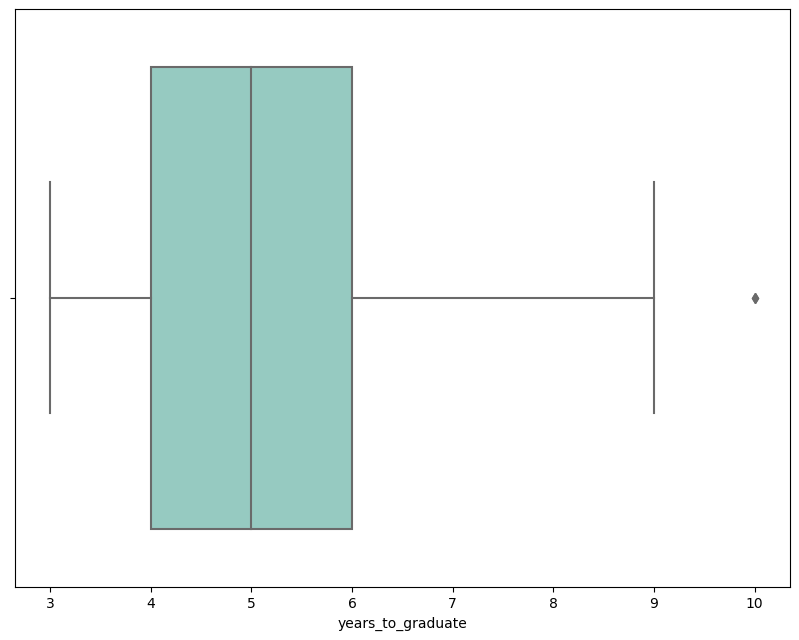

In [526]:
for col in data.columns:
    if data[col].dtype != 'object':
        bp = sns.boxplot(data = data, x = col)
        plt.show()

the only one has outliers (years to graduate) there is no one will be graduated after 10 years ->i think <-

In [527]:
data.drop(data[data['years_to_graduate']>9].index, axis = 0, inplace =True)

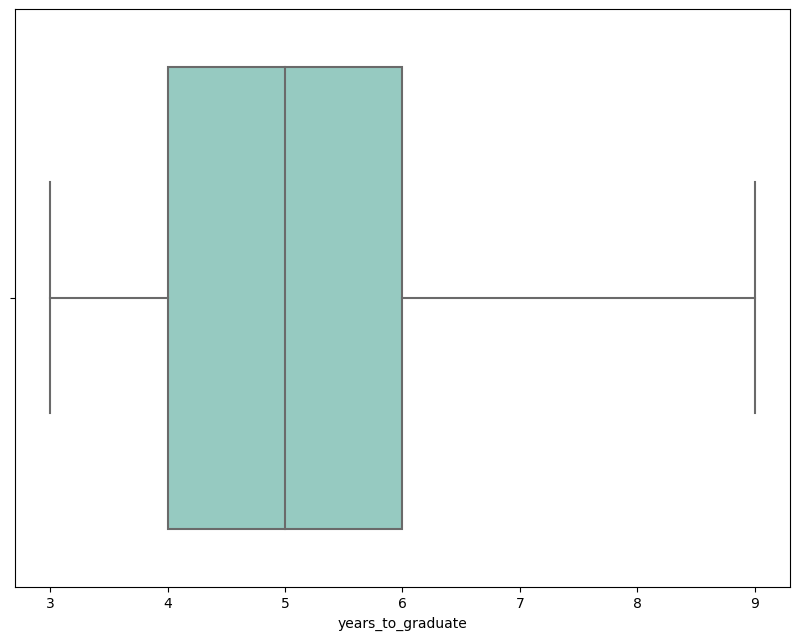

In [528]:
sns.set_palette("Set3")
bp = sns.boxplot(data = data, x = "years_to_graduate")
plt.show()

**scaling (minmaxscaler)**

In [529]:
 scaler = MinMaxScaler()

<ipython-input-530-24d176402c9c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["parental_income"])


<Axes: xlabel='parental_income', ylabel='Density'>

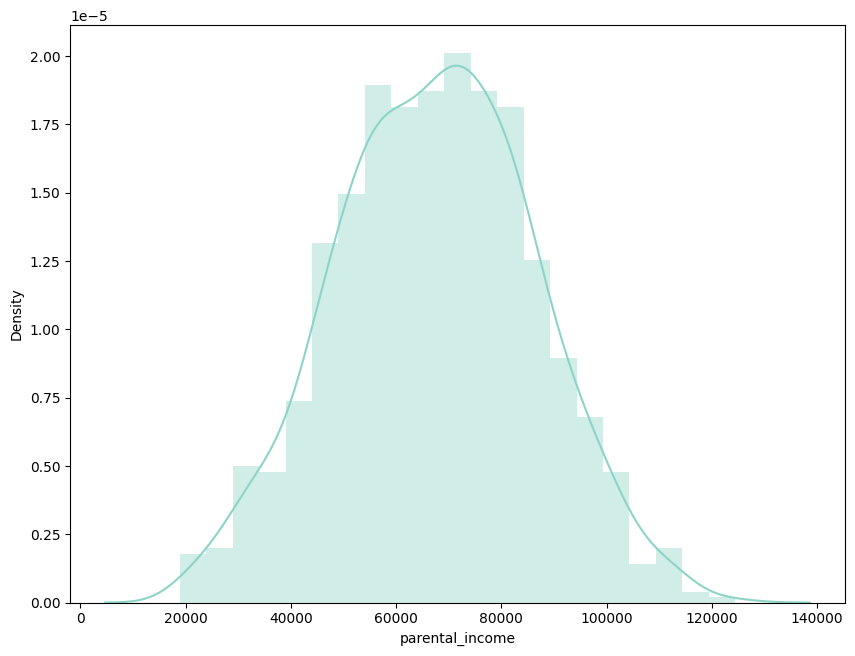

In [530]:
sns.distplot(data["parental_income"])

In [531]:
scaleddata = scaler.fit_transform(data.iloc[:,3:4])

<ipython-input-532-abcf085f24a6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scaleddata)


<Axes: ylabel='Density'>

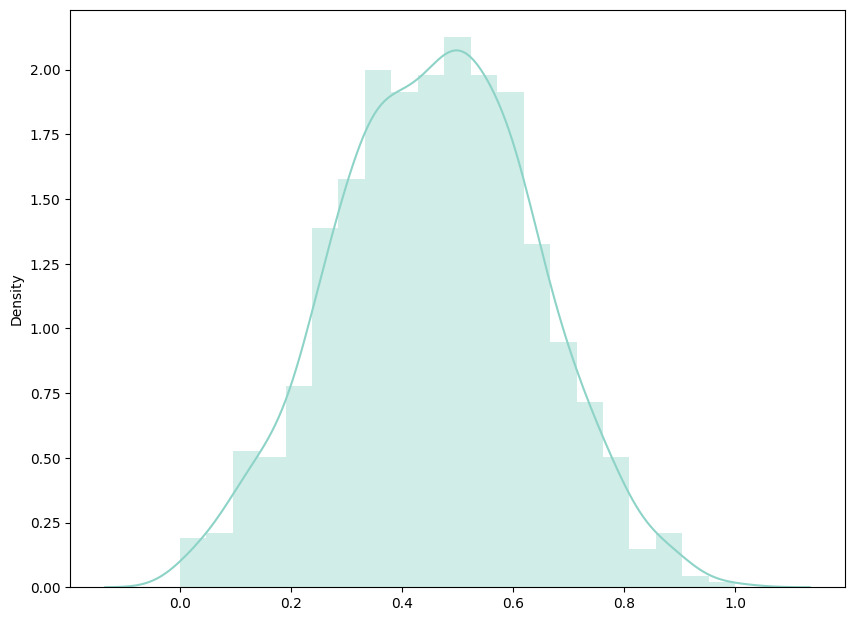

In [532]:
sns.distplot(scaleddata)

In [533]:
data["parental_income"] = scaleddata

<ipython-input-534-416615f5e14a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["sat_total_score"])


<Axes: xlabel='sat_total_score', ylabel='Density'>

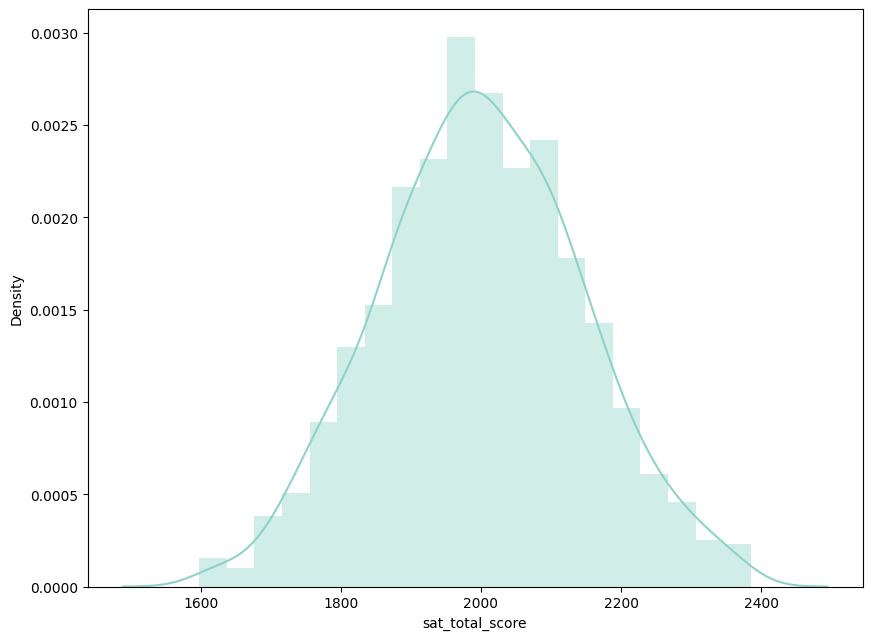

In [534]:
sns.distplot(data["sat_total_score"])

In [535]:
scaleddata = scaler.fit_transform(data.iloc[:,1:2])

<ipython-input-536-abcf085f24a6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scaleddata)


<Axes: ylabel='Density'>

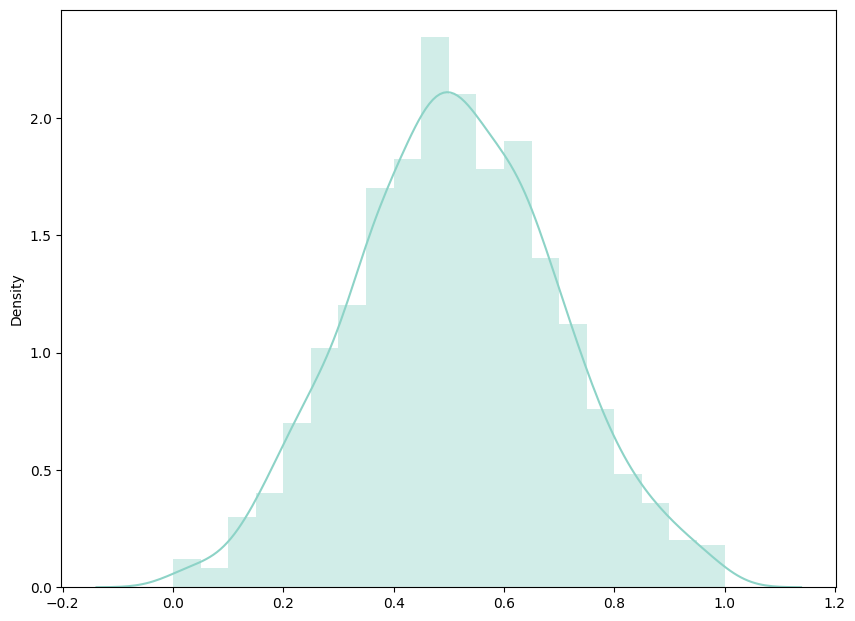

In [536]:
sns.distplot(scaleddata)

In [537]:
data["sat_total_score"] = scaleddata

** Dealing with Categorical data**

In [538]:
data.dtypes

act_composite_score              int64
sat_total_score                float64
parental_level_of_education     object
parental_income                float64
high_school_gpa                float64
college_gpa                    float64
years_to_graduate                int64
dtype: object

In [539]:
le =LabelEncoder()
data["parental_level_of_education"] = le.fit_transform(data["parental_level_of_education"])

In [540]:
data.dtypes

act_composite_score              int64
sat_total_score                float64
parental_level_of_education      int64
parental_income                float64
high_school_gpa                float64
college_gpa                    float64
years_to_graduate                int64
dtype: object

In [541]:
data

,act_composite_score,sat_total_score,parental_level_of_education,parental_income,high_school_gpa,college_gpa,years_to_graduate
0,22,0.034307,2,0.209285,3.0,3.1,7
1,29,0.625159,0,0.539114,4.0,3.4,5
2,30,0.749682,1,0.606097,4.0,3.9,3
3,33,0.702668,0,0.706794,4.0,3.7,5
4,29,0.574333,0,0.570715,4.0,3.4,6
...,...,...,...,...,...,...,...
994,33,0.728081,0,0.381200,4.0,3.4,5
996,27,0.421855,4,0.384004,3.6,3.2,4
997,32,0.659466,0,0.715291,4.0,3.8,4
998,32,0.554003,5,0.121320,3.9,3.2,8


**end of data preprocessing**


# regression

In [542]:
data

,act_composite_score,sat_total_score,parental_level_of_education,parental_income,high_school_gpa,college_gpa,years_to_graduate
0,22,0.034307,2,0.209285,3.0,3.1,7
1,29,0.625159,0,0.539114,4.0,3.4,5
2,30,0.749682,1,0.606097,4.0,3.9,3
3,33,0.702668,0,0.706794,4.0,3.7,5
4,29,0.574333,0,0.570715,4.0,3.4,6
...,...,...,...,...,...,...,...
994,33,0.728081,0,0.381200,4.0,3.4,5
996,27,0.421855,4,0.384004,3.6,3.2,4
997,32,0.659466,0,0.715291,4.0,3.8,4
998,32,0.554003,5,0.121320,3.9,3.2,8


**multiple linear regrression**

In [543]:
X1 = data.iloc[:, :-1].values
y1 = data.iloc[:,-1].values

In [544]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 0)

In [545]:
regressor1 = LinearRegression()
regressor1.fit(X1_train, y1_train)

LinearRegression()

In [546]:
y1_pred = regressor1.predict(X1_test)

In [547]:
r2_score(y1_test, y1_pred)

0.2371811290381559

In [548]:
mean_squared_error(y1_test, y1_pred)

1.5022764140004816

**poly regrression**

In [549]:
X2 = data.iloc[:, :-1].values
y2 = data.iloc[:,-1].values

In [550]:
poly_reg = PolynomialFeatures(degree = 5)
X2_poly = poly_reg.fit_transform(X2)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X2_poly, y2)

LinearRegression()

In [551]:
 y2_pred = lin_reg_2.predict(X2_poly)

In [552]:
r2_score(y2, y2_pred)

0.5864589684188493

In [553]:
mean_squared_error(y2, y2_pred)

0.8068667972139487

# clustering

In [554]:
data

,act_composite_score,sat_total_score,parental_level_of_education,parental_income,high_school_gpa,college_gpa,years_to_graduate
0,22,0.034307,2,0.209285,3.0,3.1,7
1,29,0.625159,0,0.539114,4.0,3.4,5
2,30,0.749682,1,0.606097,4.0,3.9,3
3,33,0.702668,0,0.706794,4.0,3.7,5
4,29,0.574333,0,0.570715,4.0,3.4,6
...,...,...,...,...,...,...,...
994,33,0.728081,0,0.381200,4.0,3.4,5
996,27,0.421855,4,0.384004,3.6,3.2,4
997,32,0.659466,0,0.715291,4.0,3.8,4
998,32,0.554003,5,0.121320,3.9,3.2,8


**H_clustering**

In [555]:
XH1 = data.iloc[:, [1, 3]].values
YH1 = sch.linkage(XH1, method = 'ward')

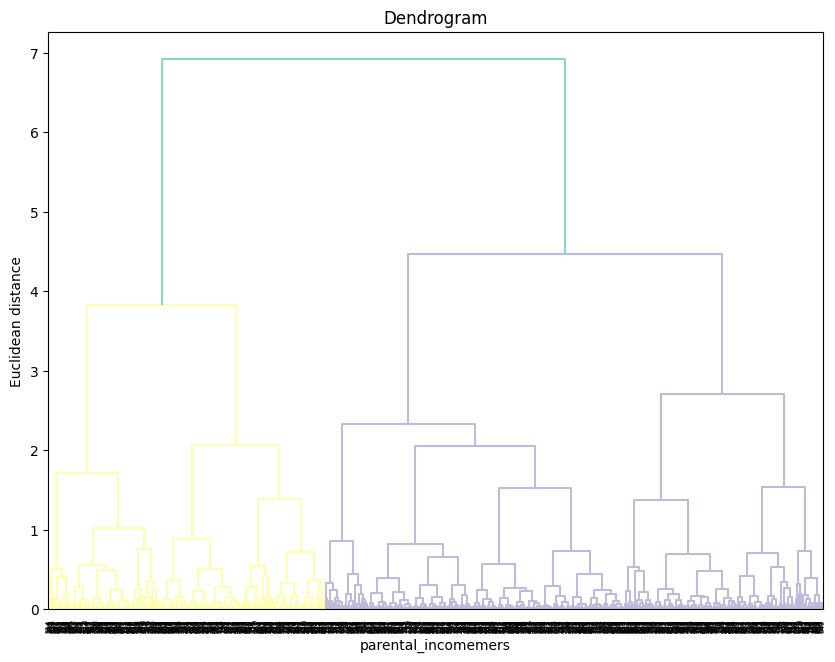

In [556]:
dendrogrm = sch.dendrogram(YH1)
plt.title('Dendrogram')
plt.xlabel('parental_incomemers')
plt.ylabel('Euclidean distance')
plt.show()

In [557]:
XH2 = data.iloc[:, [1, 3]].values
YH2 = sch.linkage(XH2, method = 'single')

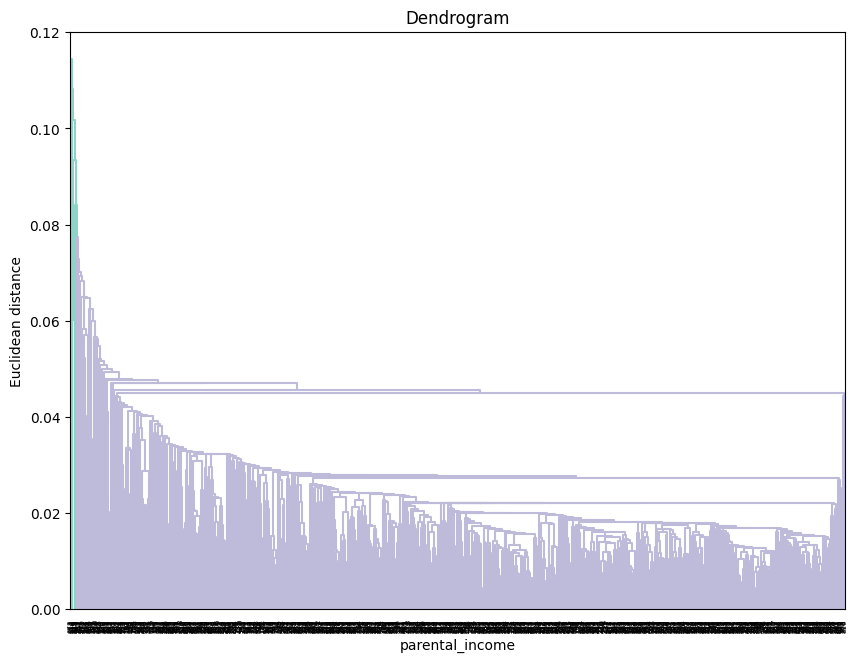

In [558]:
dendrogrm = sch.dendrogram(YH2)
plt.title('Dendrogram')
plt.xlabel('parental_income')
plt.ylabel('Euclidean distance')
plt.show()

In [559]:
XH3 = data.iloc[:, [1, 3]].values
YH3 = sch.linkage(XH3, method = 'complete')

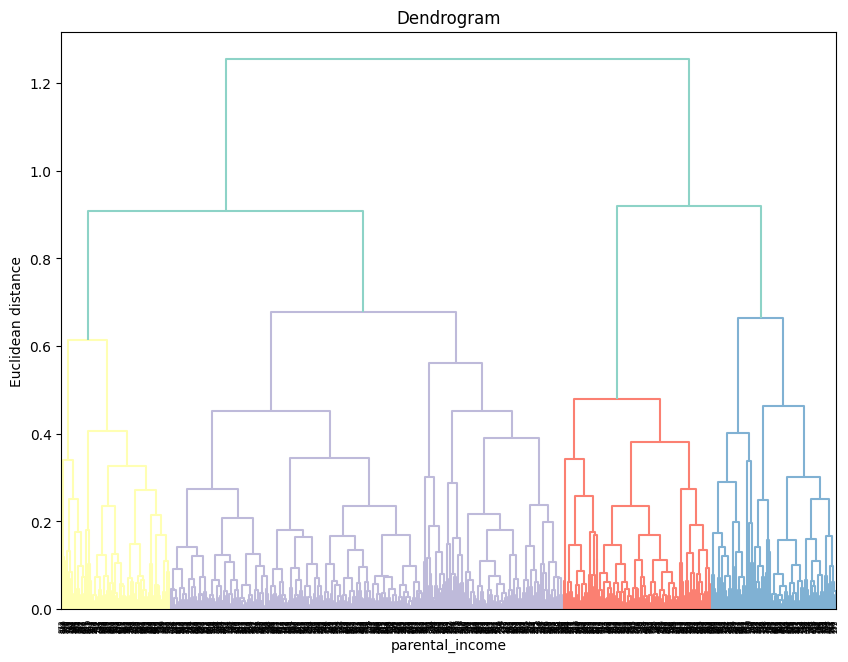

In [560]:
dendrogrm = sch.dendrogram(YH3)
plt.title('Dendrogram')
plt.xlabel('parental_income')
plt.ylabel('Euclidean distance')
plt.show()

**k_means clustering**

In [561]:
XK = data.iloc[:, [1, 3]].values

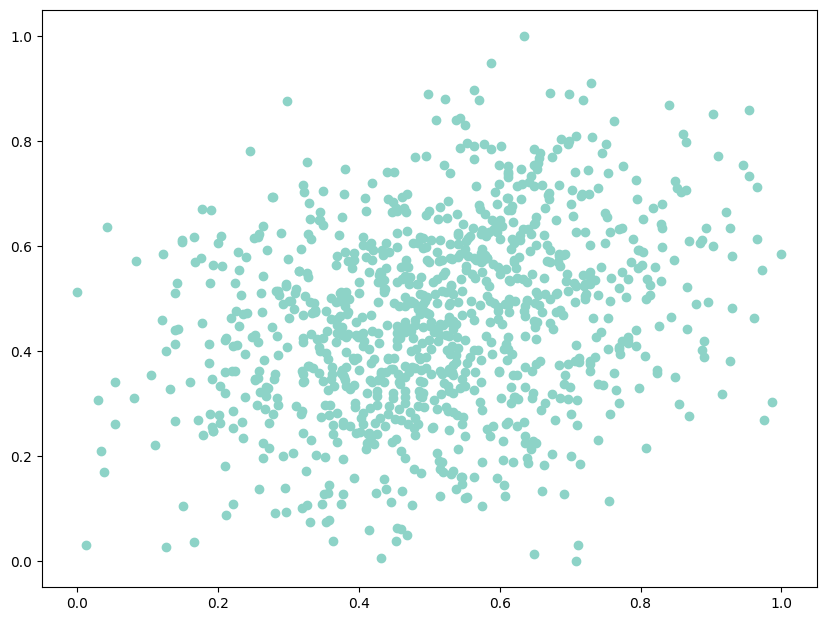

In [562]:
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.scatter(XK[:, 0], XK[:, 1])

not prefered to use k_means

**DBSCAN_clustering**

In [563]:
XD = data.iloc[:, [1, 3]].values

In [564]:
dbSCAN_Model = DBSCAN(eps=0.075, min_samples=5).fit(XD)

In [565]:
labels_custers=dbSCAN_Model.labels_
set(labels_custers)

{-1, 0, 1}

In [566]:
labels = dbSCAN_Model.labels_

In [567]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

2

In [568]:
n_noise_ = list(labels).count(-1)
n_noise_

12

In [569]:
percentage_of_Outlaiers=n_noise_/len(XD)
percentage_of_Outlaiers*100

1.2024048096192386

## Evaluating the model:

In [570]:
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(XD, labels))

Silhouette Coefficient: 0.275


i think the best clsuter here H_clustering <-ward-> 

# TREE

In [571]:
data

,act_composite_score,sat_total_score,parental_level_of_education,parental_income,high_school_gpa,college_gpa,years_to_graduate
0,22,0.034307,2,0.209285,3.0,3.1,7
1,29,0.625159,0,0.539114,4.0,3.4,5
2,30,0.749682,1,0.606097,4.0,3.9,3
3,33,0.702668,0,0.706794,4.0,3.7,5
4,29,0.574333,0,0.570715,4.0,3.4,6
...,...,...,...,...,...,...,...
994,33,0.728081,0,0.381200,4.0,3.4,5
996,27,0.421855,4,0.384004,3.6,3.2,4
997,32,0.659466,0,0.715291,4.0,3.8,4
998,32,0.554003,5,0.121320,3.9,3.2,8


In [572]:
XT = data.drop(columns = ['parental_level_of_education'])
yT = data['parental_level_of_education'].values
X_trainT, X_testT, y_trainT, y_testT = train_test_split(XT,yT,test_size = 0.30, random_state = 40, stratify=yT)

In [573]:
dt_clf = DecisionTreeClassifier(max_depth = 4)
dt_clf.fit(X_trainT, y_trainT)

DecisionTreeClassifier(max_depth=4)

In [574]:
dt_pred = dt_clf.predict(X_testT)

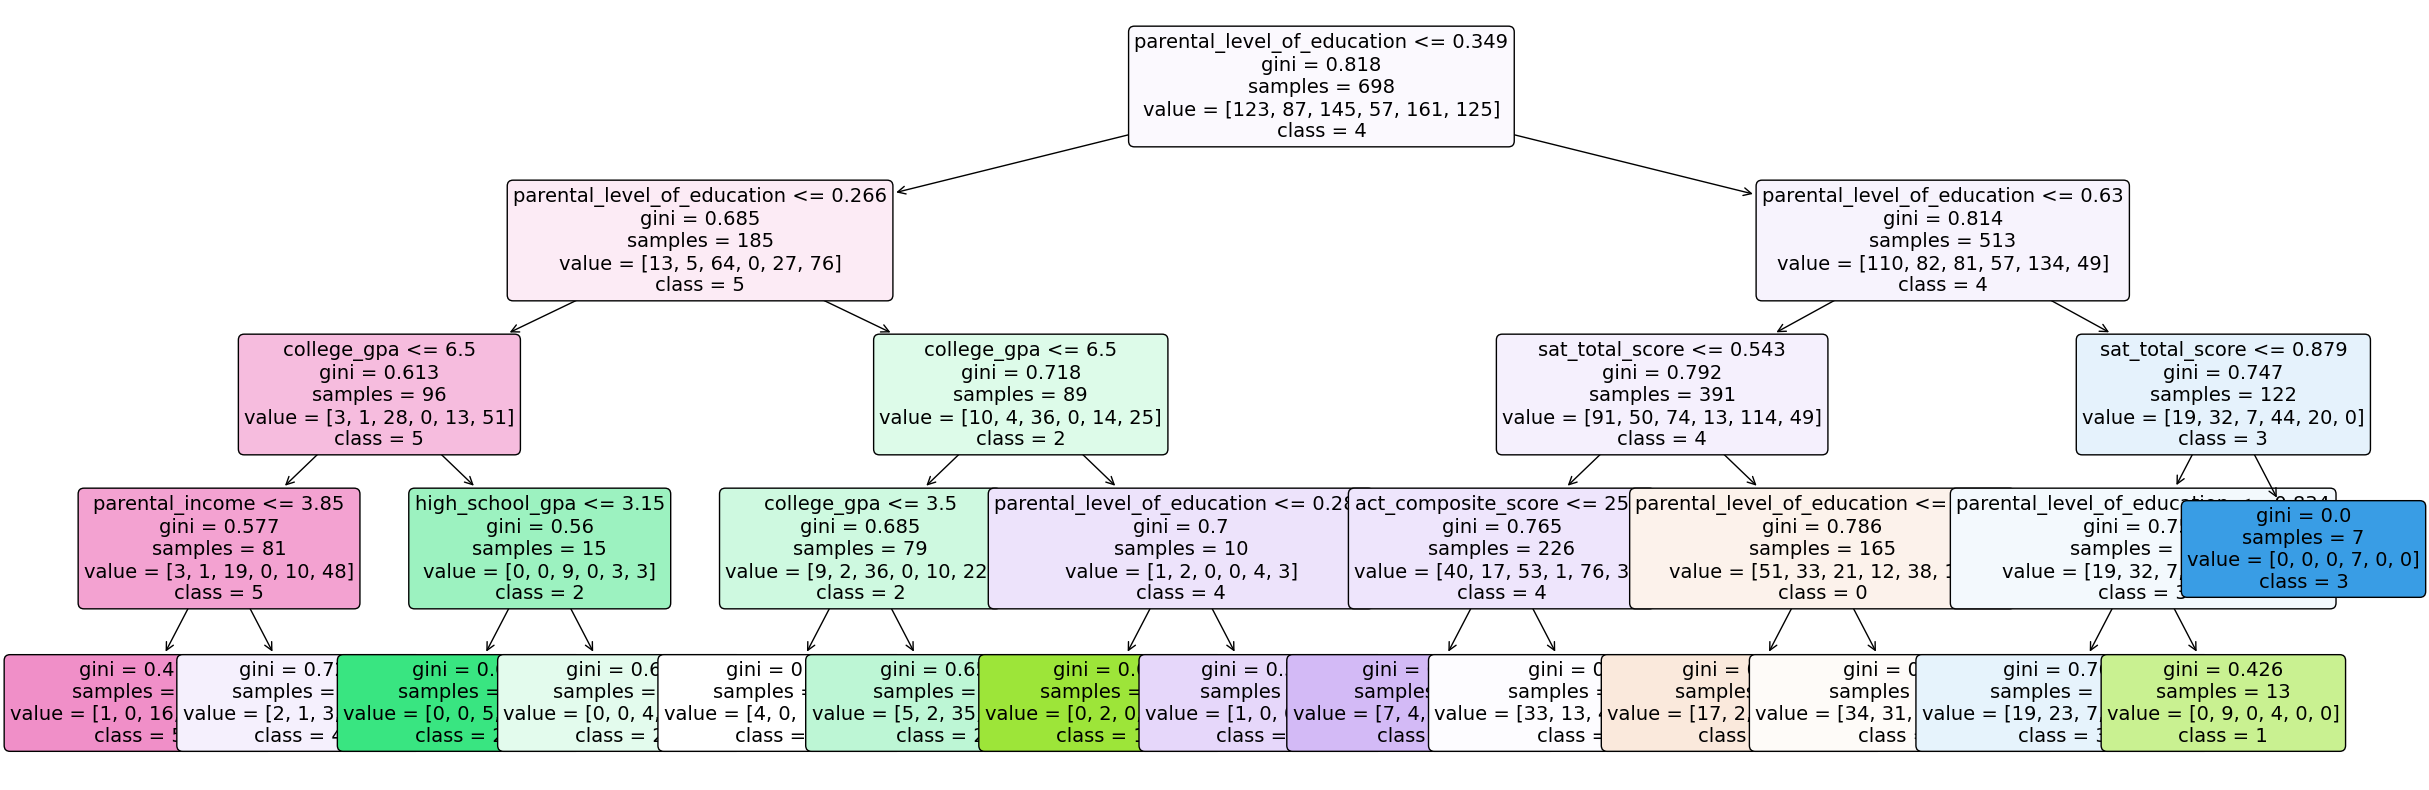

In [575]:
plt.figure(figsize=(30,10), facecolor ='white')
a = tree.plot_tree(dt_clf,
                   feature_names = data.columns[:-1],
                   class_names = ['0','1','2','3','4','5'],
                   rounded = True,
                   filled = True,
                   fontsize=14)
plt.show()

In [576]:
print(metrics.classification_report(dt_pred,y_testT))

              precision    recall  f1-score   support

           0       0.34      0.26      0.29        70
           1       0.00      0.00      0.00         6
           2       0.19      0.29      0.23        41
           3       0.42      0.24      0.30        42
           4       0.46      0.27      0.34       119
           5       0.19      0.45      0.26        22

    accuracy                           0.27       300
   macro avg       0.27      0.25      0.24       300
weighted avg       0.36      0.27      0.30       300



In [577]:
accuracy_score(y_testT, dt_pred)

0.2733333333333333

***Random Forest Classifier***




In [578]:
rf_clf = RandomForestClassifier(max_depth =10, random_state = 42)
rf_clf.fit(X_trainT, y_trainT)

RandomForestClassifier(max_depth=10, random_state=42)

In [579]:
rf_pred = rf_clf.predict(X_testT)

In [580]:
print(metrics.classification_report(rf_pred,y_testT))

              precision    recall  f1-score   support

           0       0.32      0.35      0.33        49
           1       0.41      0.44      0.42        34
           2       0.35      0.34      0.35        64
           3       0.25      0.29      0.27        21
           4       0.46      0.33      0.38        98
           5       0.26      0.41      0.32        34

    accuracy                           0.35       300
   macro avg       0.34      0.36      0.35       300
weighted avg       0.37      0.35      0.36       300



In [581]:
accuracy_score(y_testT, rf_pred)

0.35333333333333333